<a href="https://colab.research.google.com/github/aquarius31/Crime-Predictor/blob/master/chicago_crime_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [0]:
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

In [0]:
##find missing values
##plt.figure(figsize=(8,6))
##sns.heatmap(df.isnull(), cbar = False)

In [0]:
df.dropna(); ## drop rows with missing data

In [0]:
# convert dates to pandas datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)

In [0]:
x = df.sample(30000) ##sampling a part of the dataset

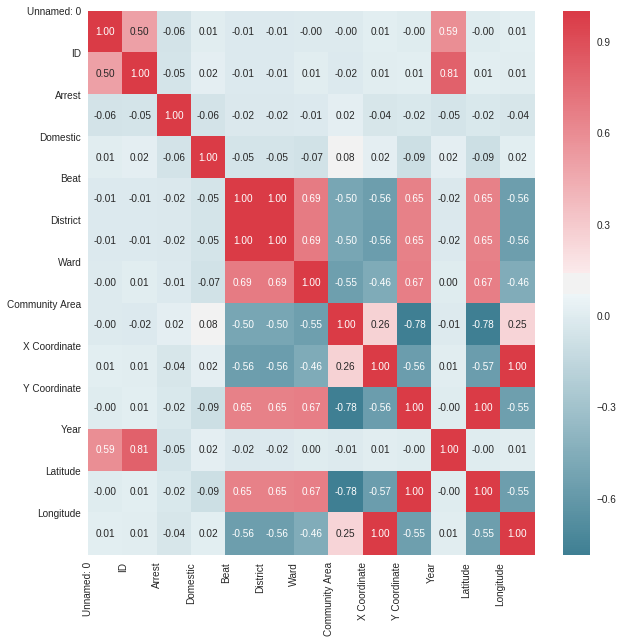

In [0]:
heatMap(x) ## correlation between variables

Firstly we want to find out what the most common crime is in Chicago. The 'Primary Type' columns is plotted with their correspending value count.

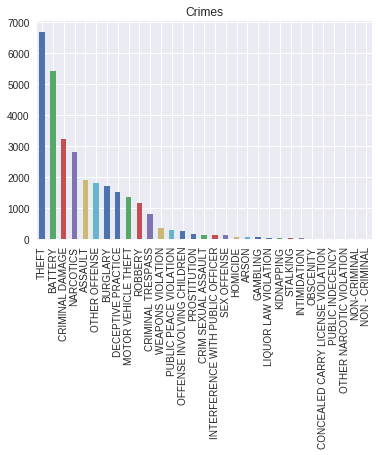

In [0]:
x['Primary Type'].value_counts().plot.bar()
plt.title("Crimes")
plt.show()

The diagram shows that 'Theft' is the most common crime type. We choose to focus on the four most common types of crime for now.

In [0]:
x_theft = x[x['Primary Type'] == "THEFT"]
x_battery = x[x['Primary Type'] == "BATTERY"]
x_cd = x[x['Primary Type'] == "CRIMINAL DAMAGE"]
x_narc = x[(x['Primary Type'] == "NARCOTICS")]

Let's plot the subtypes of the different 'Primary Types'.

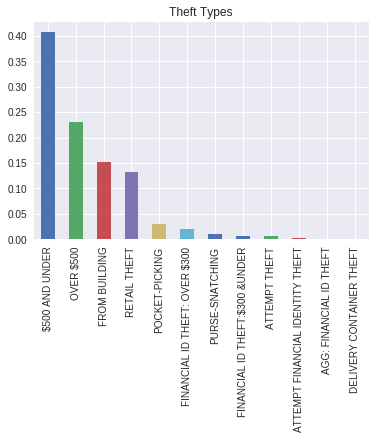

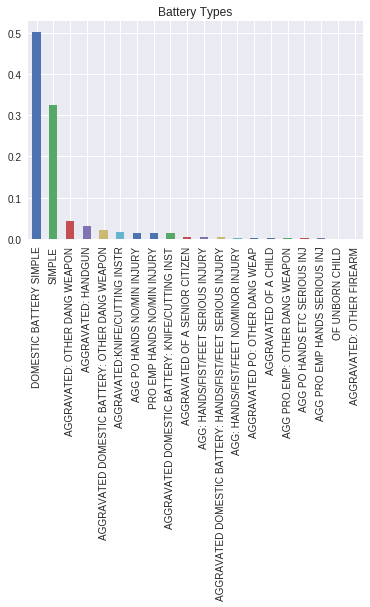

In [0]:
x_theft['Description'].value_counts(normalize=True).plot.bar()
plt.title("Theft Types")
plt.show()

x_battery['Description'].value_counts(normalize=True).plot.bar()
plt.title("Battery Types")
plt.show()


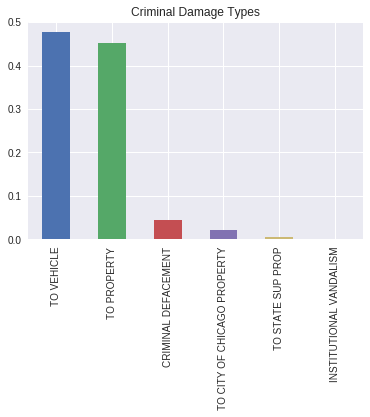

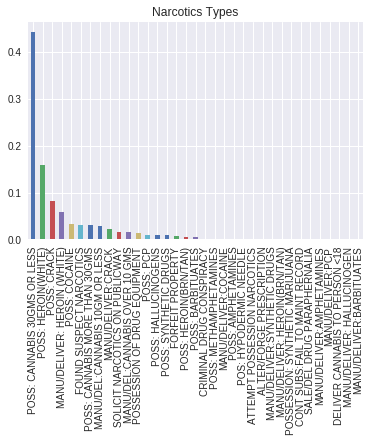

In [0]:
x_cd['Description'].value_counts(normalize=True).plot.bar()
plt.title("Criminal Damage Types")
plt.show()

x_narc['Description'].value_counts(normalize=True).plot.bar()
plt.title("Narcotics Types")
plt.show()

We now use a heat map and plot the coordinates for each crime in order to get an overview of where the crimes were generally commited.

Heat map over cooridantes of crimes


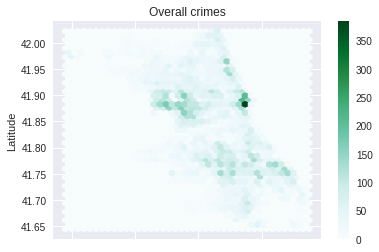

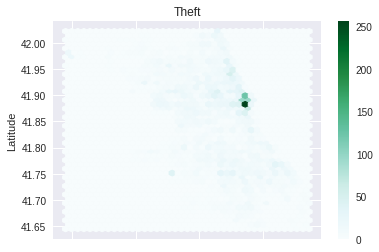

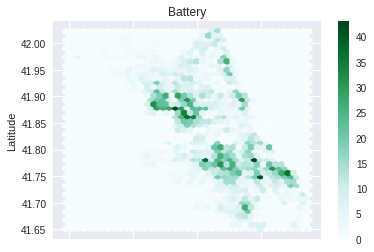

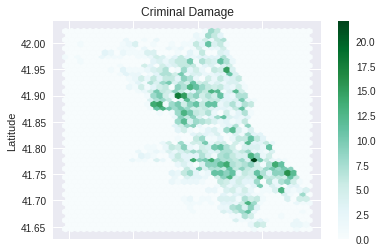

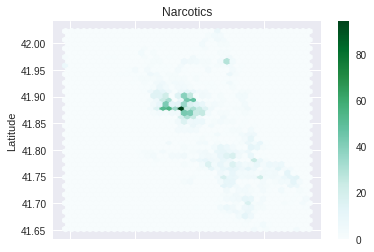

In [0]:
print("Heat map over cooridantes of crimes")
x.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Overall crimes")
plt.show()

x_theft.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Theft")

x_battery.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Battery")

x_cd.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Criminal Damage")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Narcotics")
plt.show()

Now let's look at the arrest success rate. 

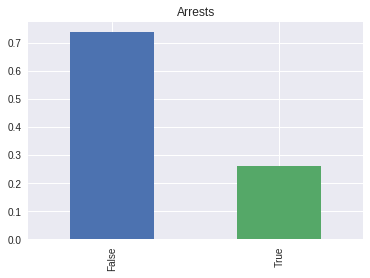

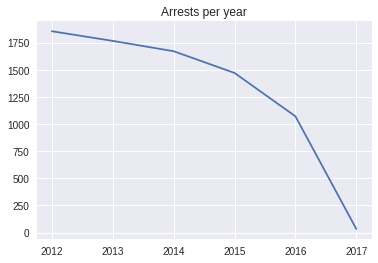

In [0]:
x['Arrest'].value_counts(normalize=True).plot.bar()
plt.title("Arrests")
plt.show()

x[x.Arrest == True]['Year'].value_counts().plot.line()
plt.title("Arrests per year")
plt.show()

We plot the arrest rate for all types of crimes. 

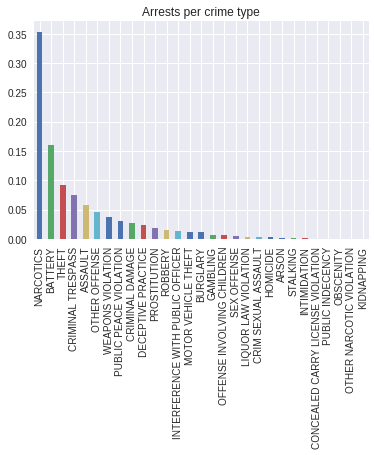

In [0]:
x[x.Arrest == True]['Primary Type'].value_counts(normalize=True).plot.bar()
plt.title("Arrests per crime type")
plt.show()

We now know which types of crimes are commited and where, now let's find out when.

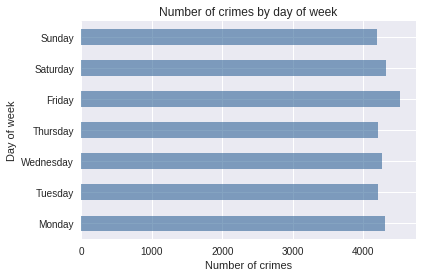

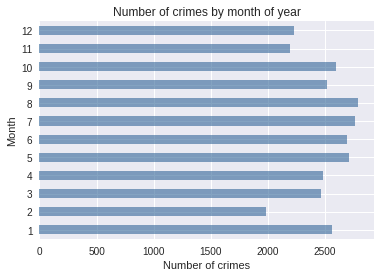

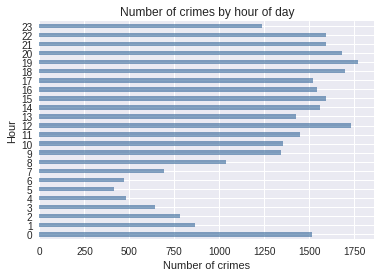

In [0]:

color = (0.2, 0.4, 0.6, 0.6)

days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
x.groupby([x.index.dayofweek]).size().plot(kind='barh', color=color)
plt.ylabel('Day of week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of week')
plt.show()


x.groupby([x.index.month]).size().plot(kind='barh', color=color)
plt.ylabel('Month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of year')
plt.show()


x.groupby([x.index.hour]).size().plot(kind='barh', color=color)
plt.ylabel('Hour')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by hour of day')
plt.show()



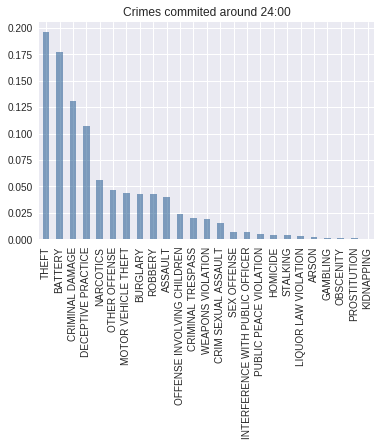

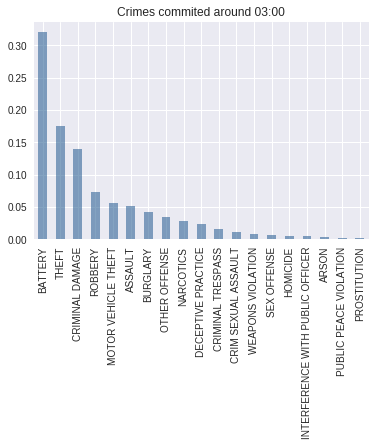

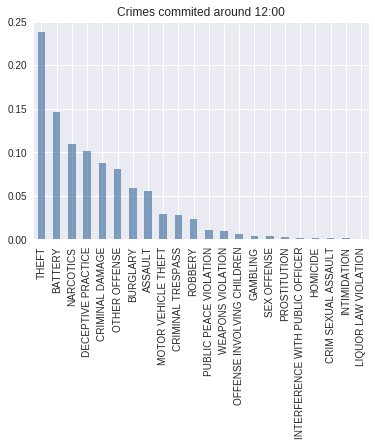

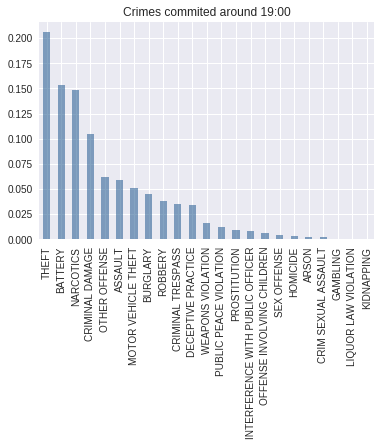

In [0]:
color = (0.2, 0.4, 0.6, 0.6)

x[x.index.hour == 0]['Primary Type'].value_counts(normalize=True).plot.bar(color=color)
plt.title("Crimes commited around 24:00")
plt.show()

x[x.index.hour == 3]['Primary Type'].value_counts(normalize=True).plot.bar(color=color)
plt.title("Crimes commited around 03:00")
plt.show()

x[x.index.hour == 12]['Primary Type'].value_counts(normalize=True).plot.bar(color=color)
plt.title("Crimes commited around 12:00")
plt.show()

x[x.index.hour == 19]['Primary Type'].value_counts(normalize=True).plot.bar(color=color)
plt.title("Crimes commited around 19:00")
plt.show()

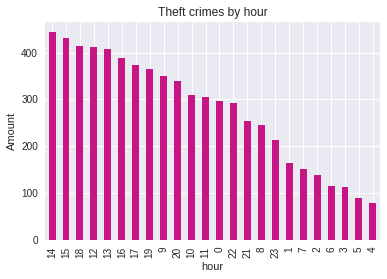

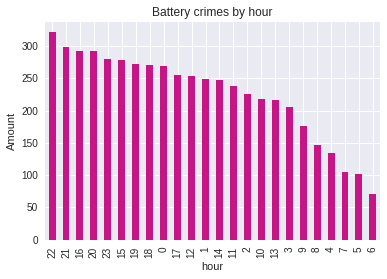

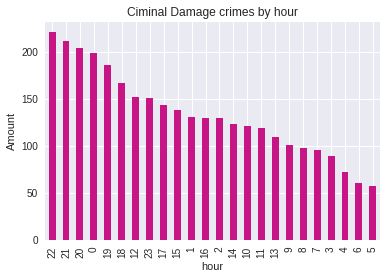

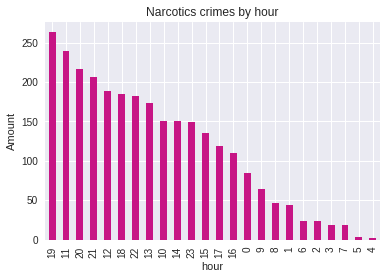

In [0]:
color = "mediumvioletred"

x[x['Primary Type'] == 'THEFT'].index.hour.value_counts().plot.bar(color=color)
plt.title("Theft crimes by hour")
plt.xlabel("hour")
plt.ylabel("Amount")
plt.show()

x[x['Primary Type'] == 'BATTERY'].index.hour.value_counts().plot.bar(color=color)
plt.title("Battery crimes by hour")
plt.xlabel("hour")
plt.ylabel("Amount")
plt.show()

x[x['Primary Type'] == 'CRIMINAL DAMAGE'].index.hour.value_counts().plot.bar(color=color)
plt.title("Ciminal Damage crimes by hour")
plt.xlabel("hour")
plt.ylabel("Amount")
plt.show()

x[x['Primary Type'] == 'NARCOTICS'].index.hour.value_counts().plot.bar(color=color)
plt.title("Narcotics crimes by hour")
plt.xlabel("hour")
plt.ylabel("Amount")
plt.show()